# Samin Intisar

## Research question/interests

Briefly describe your research question or interests here.

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv("../data/raw/Stats.csv", encoding="ISO-8859-1", delimiter = ";")

#Deleting unnecessary rows
df = df.drop(df[df.Min < 300].index)
df = df.drop(df[df.Pos == 'GK'].index)
df = df.drop(df[df.Pos == 'GKMF'].index)
df = df.drop(df[df.Pos == 'MFFW'].index)
df = df.drop(df[df.Pos == 'FWMF'].index)
df = df.drop(df[df.Pos == 'MFDF'].index)
df = df.drop(df[df.Pos == 'DFMF'].index)
df = df.drop(df[df.Pos == 'FWDF'].index)
df = df.drop(df[df.Pos == 'DFFW'].index)

print(df)

        Rk             Player Nation Pos           Squad            Comp  \
0        1         Max Aarons    ENG  DF    Norwich City  Premier League   
1        2   Yunis Abdelhamid    MAR  DF           Reims         Ligue 1   
2        3  Salis Abdul Samed    GHA  MF   Clermont Foot         Ligue 1   
3        4    Laurent Abergel    FRA  MF         Lorient         Ligue 1   
5        6     Dickson Abiama    NGA  FW  Greuther Fürth      Bundesliga   
...    ...                ...    ...  ..             ...             ...   
2915  2916      Igor Zubeldia    ESP  DF   Real Sociedad         La Liga   
2916  2917   Martín Zubimendi    ESP  MF   Real Sociedad         La Liga   
2917  2918   Szymon ?urkowski    POL  MF          Empoli         Serie A   
2918  2919    Martin Ødegaard    NOR  MF         Arsenal  Premier League   
2919  2920        Milan ?uri?    BIH  FW     Salernitana         Serie A   

       Age  Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon    OG  \
0     22.0  

In [106]:
forwards = df[df.Pos == "FW"]
midfielders = df[df.Pos == "MF"]
defenders = df[df.Pos == "DF"]

forwards = forwards[["Goals", "PasTotCmp", "TklWon", "Assists", "Touches", "DriPast"]]
midfielders = midfielders[["Goals", "PasTotCmp", "TklWon", "Assists", "Touches", "DriPast"]]
defenders = defenders[["Goals", "PasTotCmp", "TklWon", "Assists", "Touches", "DriPast"]]



In [98]:
print(forwards.describe())

            Goals   PasTotCmp      TklWon     Assists     Touches     DriPast
count  305.000000  305.000000  305.000000  305.000000  305.000000  305.000000
mean     0.349574   18.677574    0.587672    0.136197   38.395410    1.176230
std      0.251867    7.578758    0.433887    0.159475    9.598508    0.836487
min      0.000000    6.430000    0.000000    0.000000   14.300000    0.000000
25%      0.190000   13.500000    0.300000    0.000000   31.900000    0.560000
50%      0.330000   16.900000    0.510000    0.110000   36.100000    1.000000
75%      0.480000   21.500000    0.760000    0.190000   42.900000    1.530000
max      2.000000   48.900000    3.080000    1.330000   76.300000    6.250000


In [99]:
print(midfielders.describe())

            Goals   PasTotCmp      TklWon     Assists     Touches     DriPast
count  495.000000  495.000000  495.000000  495.000000  495.000000  495.000000
mean     0.086162   40.522222    1.442707    0.087192   60.277576    0.940848
std      0.132455   13.589809    0.609632    0.136420   13.499624    0.662484
min      0.000000   14.600000    0.000000    0.000000   27.400000    0.000000
25%      0.000000   30.550000    1.040000    0.000000   49.800000    0.510000
50%      0.040000   38.600000    1.380000    0.060000   59.000000    0.790000
75%      0.130000   48.000000    1.810000    0.130000   68.800000    1.225000
max      1.430000   96.100000    5.000000    1.670000  109.600000    4.260000


In [100]:
print(defenders.describe())

            Goals   PasTotCmp      TklWon     Assists     Touches     DriPast
count  798.000000  798.000000  798.000000  798.000000  798.000000  798.000000
mean     0.043659   42.607018    1.137932    0.052043   63.030326    0.554649
std      0.068619   12.835130    0.490516    0.081777   12.471362    0.542525
min      0.000000   16.700000    0.000000    0.000000   30.200000    0.000000
25%      0.000000   33.325000    0.760000    0.000000   53.800000    0.160000
50%      0.000000   39.900000    1.100000    0.000000   61.200000    0.405000
75%      0.070000   49.200000    1.430000    0.080000   70.100000    0.780000
max      0.770000   87.200000    3.060000    0.530000  105.300000    4.290000


In [101]:
y1 = fw_mean = forwards.describe().loc['mean', ['Goals', 'Assists', 'DriPast', 'TklWon']]
y2 = mf_mean = midfielders.describe().loc['mean', ['Goals', 'Assists', 'DriPast', 'TklWon']]
y3 = df_mean = defenders.describe().loc['mean', ['Goals', 'Assists', 'DriPast', 'TklWon']]

x = np.arange(len(y1))

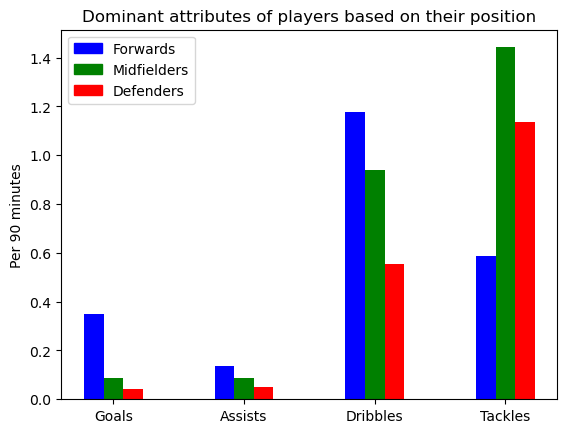

In [102]:
#Bar Plot
bar_width = 0.15
plt.bar(x, y1, width = bar_width, color = 'blue')
plt.bar(x + bar_width, y2, width = bar_width, color = 'green')
plt.bar(x + bar_width*2, y3, width = bar_width, color = 'red')

#Labels
plt.xticks(x + bar_width, ['Goals', 'Assists', 'Dribbles', 'Tackles'])
plt.title('Dominant attributes of players based on their position')
plt.ylabel('Per 90 minutes')

#Legend
colors = {'Forwards':'blue', 'Midfielders':'green', 'Defenders':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

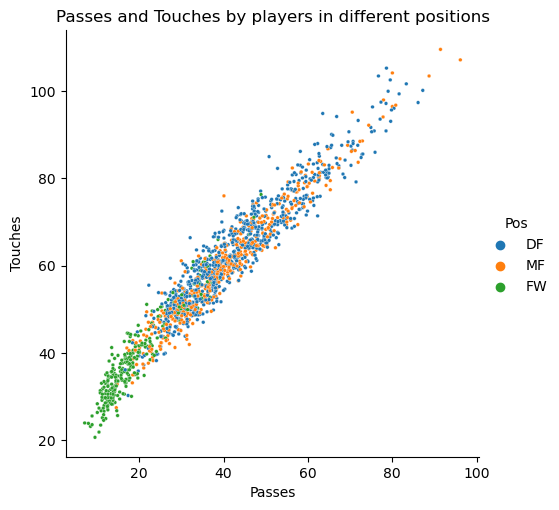

In [135]:
#Scatter Plot
sns.relplot(x = 'PasTotCmp',
            y = 'Touches',
            hue = 'Pos',
            data = df,
            s = 7).set(xlabel = 'Passes',
                                  ylabel = 'Touches',
                                  title = 'Passes and Touches by players in different positions')

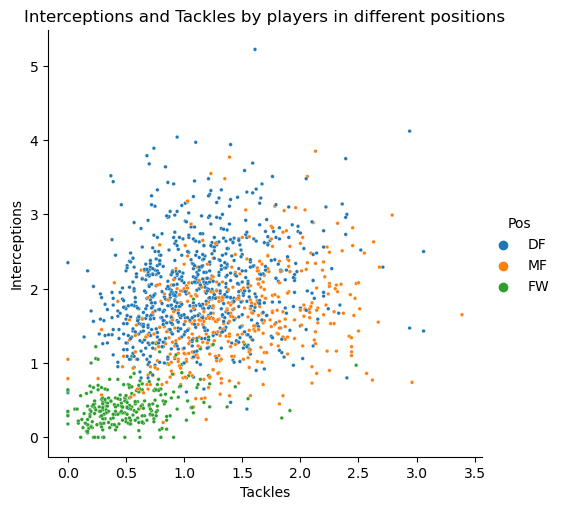

In [133]:
#Scatter Plot
sns.relplot(x = 'TklWon',
            y = 'Int',
            hue = 'Pos',
            data = df,
            s = 7).set(xlabel = 'Tackles',
                                  ylabel = 'Interceptions',
                                  title = 'Interceptions and Tackles by players in different positions')